**Daniel Goings<br>
dcgoings@buffalo.edu<br>
MTH337 Project 5 - Radioactive Decay, Rossler Equations and Chaos**

In [1]:
import numpy as np
import numpy.matlib
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Introduction

Throughout this project, we will explore radioactive decay equations and forms as well as the Rossler equations and their periodic versus chaotic nature. 

The first half of the project will focus on radioactive decay in the form of a differential equation and its relationship with population, the decay constant, and half-life. While radioactive decay is unstable and completely random in nature, there still remains a highly statistical piece of the puzzle that can be used to calculate the decay of species and elements. 

Our project objectives for this section are to investigate the radioactive decay equation, its exact solution and how it can derive the half-life equation, which is the time it takes for a population to become half of the starting population, and plot these equations using in-class methods learned such as the Euler method and RK4 method. We will prove for certain values that the population does, in fact, halve at each time-step interval and how it reveals a geometric progression. Additionally, we will briefly explore the differences between the methods previously mentioned and used, Euler versus RK4, and how they compare.

In the second half of our project, we will dive into the Rossler equations, which is a system of differential equations with a set of three parameters that we will discover can be used to influence the behavior of the equations in a very periodic or chaotic manner, depending on their values. We will plot several of these equations and show how each parameter has influence over the other and show our results.

# PART 1: Radioactive Decay

### PROBLEM 1: The standard quantity used to characterize radioactive elements is called the half-life. The half-life is defined in a specific manner. Half-life is defined as the time it takes the population to become half of the original population. Using Equation 2, $N = N_0e^{-\lambda t}$, show that half-life can be calculated to be $T_{1/2} = \frac{log2}{\lambda}$.

In our first equation, $N_0$ represents the initial number of atoms, $\lambda$ represents the decay constant, and the variable $t$ represents the amount of time that has passed. In our second equation, $T_{1/2}$ represents the half-life, and $\lambda$ as previously mentioned represents the decay constant.

Now, given: 

$$N = N_0e^{-\lambda t}$$

We can divide $N_0$ by both sides.

$$\frac{N}{N_0} = e^{-\lambda t}$$

Take the natural log of both sides.

$$ln\frac{N}{N_0} = ln(e^{-\lambda t})$$

Which further equals:

$$ln\frac{N}{N_0} = (-\lambda t)\,ln(e)$$

Since $ln(e) = 1$, this simplifies to:

$$ln\frac{N}{N_0} = -\lambda t$$

Divide both sides by $-\lambda$ to get $t$ by itself.

$$ t = \frac{-ln(N \,/\, N_0)}{\lambda}$$

Almost there! Since half-life is exactly when $N / N_0 = \frac{1}{2}$, we can plug this to the above equation:

$$T_{1/2} = \frac{-ln(1/2)}{\lambda}$$

And finally, we know -ln(1/2) = 0.69314.. which is also equal to ln(2):

$$T_{1/2} = \frac{ln(2)}{\lambda}$$

Therefore, we have concluded that we can calculate the half-life, $T_{1/2}$, from the given the equation $N = N_0e^{-\lambda t}$ in which we observed $T_{1/2} = \frac{ln(2)}{\lambda}$

Throughout my research, I discovered that the decay equation can be represented by several equations, all with similar relationships between the half-life, decay time, and decay constant.[2,3] Although quite elementary, there was a specific source [3] that broke down this relationship very easily for anyone to understand. For example, almost identical to our earlier equation $N = N_0e^{-\lambda t}$, another formula we can use to calculate to final population is:

$$ N = N_0 \left(\frac{1}{2}\right)^{t\,/\, t_{1/2}}$$

In English, the new population equals the starting population times .5 raised to the power of time divided by half-life.

So what can we do with this information? Well, also found in source [3], they provide us with some very good examples of actual elements and their half-life. For example, they state Plutonium-239 has a half-life of 24,110 years. So if you started with 100 pounds of Plutonium-239, after 24,110 years you would still have 50 pounds. 48,220 years later you would be left with 12.5 pounds.

So using what we learned in the equations above and our Plutonium-239 facts, let's code this and confirm for ourselves.

In [138]:
def hldc(x):
    """
    Given the decay constant or half-life, calculates and returns the opposite.
    
    Keywords:
        x: The given decay constant or half-life that you are trying to convert into the other.
        
    """
    return math.log(2) / x

def second_decay(N, hl, t):
    """
    Function returns our new second radioactive decay equation.
    
    Keywords:
        N = initial population of the species or element
        hl = half-life
        t = time elapsed
        
    """
    return N * (.5) ** (t / hl)

    # other equations
    #return  N * ( (2) ** (-t/hl) )
    #return  N * ( math.exp(-decayConstant(hl) * t) )


print(second_decay(100, 24110, 48220))

25.0


If for some reason, we have the decay constant but not the half-life, or vice versa, we can easily calculate these values for later use.

In [139]:
print("Given the half-life %s, our decay constant equals %s" % (24110, hldc(24110)))

Given the half-life 24110, our decay constant equals 2.8749364602237465e-05


In [140]:
print("Given the decay constant %s, our half-life equals %s" % (2.8749364602237465e-05, hldc(2.8749364602237465e-05)))

Given the decay constant 2.8749364602237465e-05, our half-life equals 24110.0


And we can include the above step direction into our second_decay function in order to find out how much Plutonium-239 we have remaining after a certain amount of time.

In [143]:
print("After %s years, %s pounds of Plutonium-239 remains out of a starting amount of %s pounds." 
      % (96440, second_decay(100, decayConstant(2.8749364602237465e-05), 96440), 100))

After 96440 years, 6.25 pounds of Plutonium-239 remains out of a starting amount of 100 pounds.


### PROBLEM 2: Solve Equation 1 using the Euler method and the RK4 method. Show that the population after $T_{1/2}$ amount of time, is half of the starting population. In fact, you should be able to see, that if you continue ahead in time, the population at $2T_{1/2}$ is exactly half of the population at $T_{1/2}$ and so on. In other words, if population is recorded after every $T_{1/2}$, you will get a geometric progression.

In [220]:
def radioactive(N=0.1, lamb=0.1):
    """
    The given Equation 1 for radioactive decay.
    
    """
    return -lamb * N

In [221]:
def euler(func, h = 0.1, yCurrent = 0.1, *funcArgs):
    """
    Function performs one Euler step returns the value for the next iteration.
    
    Keywords:
    func: right hand side of the differential equation. 
          Default is the radioactivity function i.e. radioactive().

    h: Input. This is the time step used to the advance the solution to the next time point.
    yCurrent: Value of variable at current time step.
    *funcArgs: Parameters for the function in the differential equation.
    yNext: Output. Value of the variable at the next time step.
    
    """
    
    # Initialize
    yNext = 0.0
    
    # Calculate next time step
    yNext = h * func(yCurrent, *funcArgs) + yCurrent
    
    return yNext

In [222]:
numIter = 50
y = np.zeros((numIter, 1))
y[0] = 50.0
h = 0.5
lamb = 1.0
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(y)):
    y[i] = euler(radioactive, h, y[i-1], lamb)

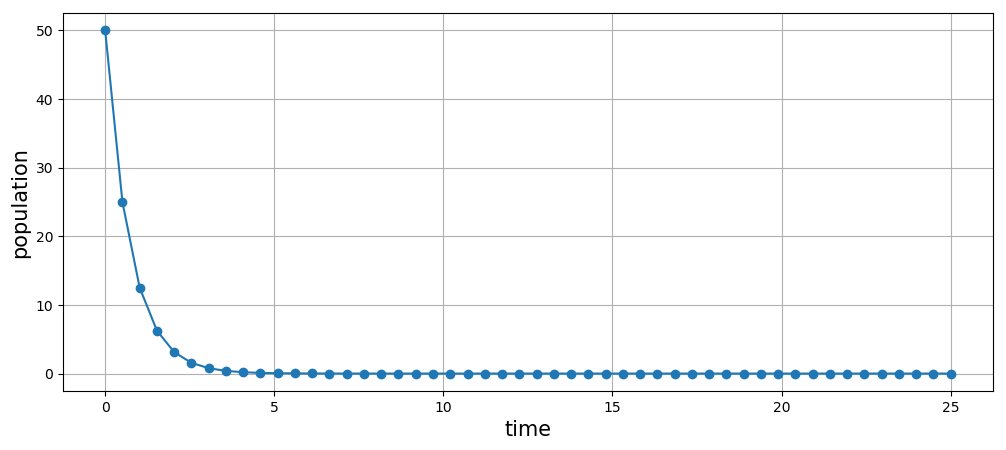

In [223]:
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList, y,  '.-', markersize=12)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('population', fontsize=15)
axes.grid(True)

As seen above with the Euler method, given a starting population of 50, after one step, it appears that that the population has dropped to 25, then to 12.5, then 6.25, etc. etc., and possibly confirming that the population is halved after each $T_{1/2}$ amount of time.

We will now implement the same data using the RK4 function, making sure to keep the step-size the same for future comparison analysis.

In [224]:
def rk4(func, h = 0.1, yCurrent = 0.1, *funcArgs):
    """
    Function performs one RK4 step returns the value for the next iteration.
    
    Keywords:
    func: right hand side of the differential equation. 
          Default is the radioactivity function i.e. radioactive().
    h: Input. This is the time step used to the advance the solution to the next time point.
    yCurrent: Value of variable at current time step.
    *funcArgs: Parameters for the function in the differential equation.
        
    yNext: Output. Value of the variable at the next time step.
    
    """
    
    # Initialize
    yNext = 0.0
    
    # Calculate k1, k2, k3 and k4
    
    k1 = func(yCurrent, *funcArgs)
    k2 = func(yCurrent + h*k1/2, *funcArgs)
    k3 = func(yCurrent + h*k2/2, *funcArgs)
    k4 = func(yCurrent + h*k3, *funcArgs)
    
    # Calculate next time step
    yNext = (h/6)*(k1 + 2*k2 + 2*k3 + k4) + yCurrent
    
    return yNext

In [225]:
numIter = 50
yRK4 = np.zeros((numIter,1))
yRK4[0] = 50.0
h = 0.5
lamb = 1.0
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i] = rk4(radioactive, h, yRK4[i-1], lamb)

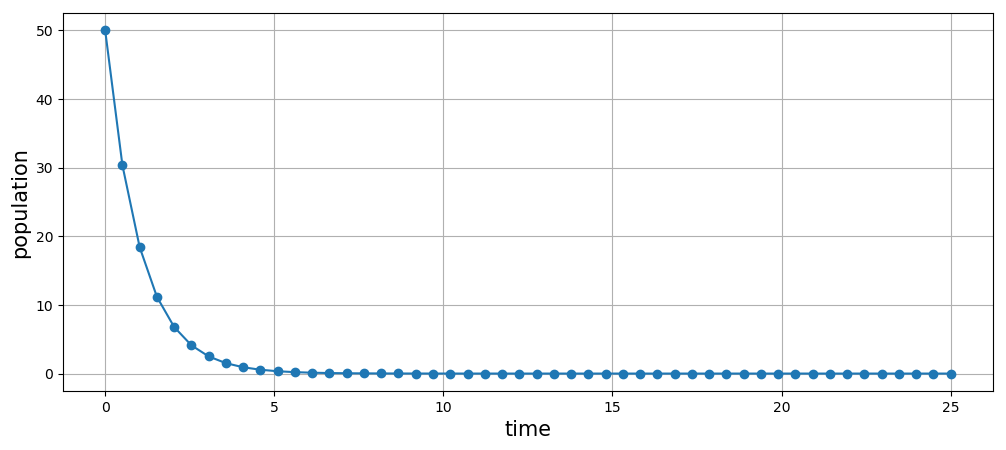

In [226]:
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList, yRK4, '.-', markersize=12)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('population', fontsize=15)
axes.grid(True)

Now, we can overlap both plots of the Euler and RK4 methods on top of the exact solution plot, which was given to us earlier as $N = N_0e^{-\lambda t}$.

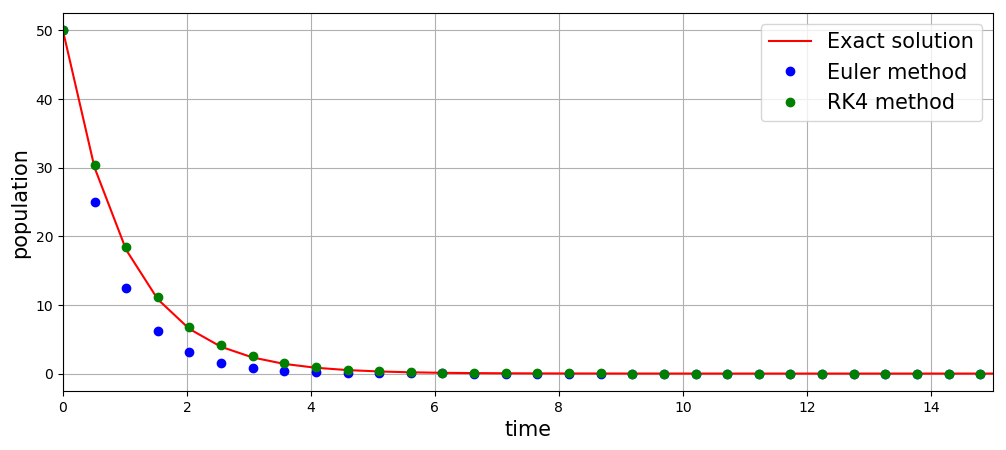

In [227]:
fig, axes = plt.subplots(figsize=(12,5), dpi = 100)

axes.plot(tList, y[0]*np.exp(-lamb*tList), label='Exact solution', color='red')
axes.plot(tList, y, '.', markersize=12, label='Euler method', color='blue')
axes.plot(tList, yRK4, '.', markersize=12, label='RK4 method', color='green')

axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('population', fontsize=15)
axes.set_xlim(0, 15)
plt.legend(fontsize=15)
axes.grid(True)
# axes.set_yscale('log')

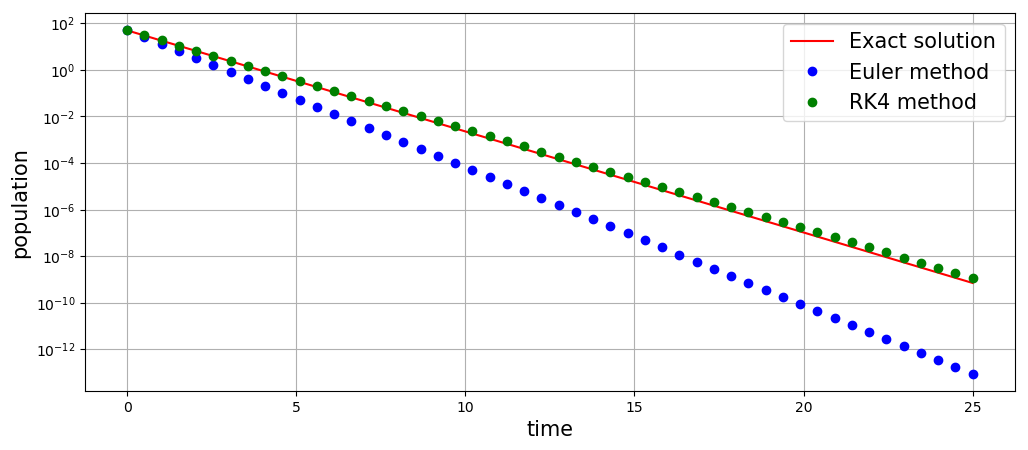

In [228]:
fig, axes = plt.subplots(figsize=(12,5), dpi = 100)

axes.plot(tList, y[0]*np.exp(-lamb*tList), label='Exact solution', color='red')
axes.plot(tList, y, '.', markersize=12, label='Euler method', color='blue')
axes.plot(tList, yRK4, '.', markersize=12, label='RK4 method', color='green')

axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('population', fontsize=15)
axes.set_yscale('log')
plt.legend(fontsize=15)
axes.grid(True)

Now upon comparison of the two methods for the same step-size, h = 0.5, we can observe that while 
the Euler method will reach the new populations faster, the RK4 method has much better accuracy. Something I read that I found incredibly interesting is a quote by Wayne Gretzky which is an excellent comparison of the two methods: "I skate to where the puck is going to be, not to where it has been." In other words, Euler follows where the path is, RK4 follows where the path is going to be. Both methods will clearly reach the correct values that we expect them to reach, however, *when* they reach them and how close they are at that moment is the critical difference between the two.

# PART 2: Rossler Equations and Chaos

In this section of the project, we are going to investigate Rossler equations, which are a system of differential equations given as $\frac{dx}{dt} = -y-z$,  $\frac{dy}{dt} = x + ay$,  and $\frac{dz}{dt} = b + z(x-c)$

The three constant parameters, $a, b,$ and $c$, each have their own varying effects on the system that can cause it to "converge toward a periodic orbit, fixed point, or escape towards infinity" [4]. This means in the below plots, we will not only be able to see the effects and behaviors that each parameters has, but also how they are influenced by each other.

In [105]:
def rossler(X = np.array([0.0, 0.0, 0.0]), omega = np.array([0.2, 0.2, 2.5])):
    """
    Function returns the output vector for the Rossler equations.
    
    Keywords:
    X: Input. This is the vector of values in the Rossler equation
    omega: a, b, and c input parameters in the Rossler equations
    
    output: returns the vector containing the Rossler equations for the given omega (a, b, c) values.
    
    """
    
    # Initialize output
    xOut = np.zeros((len(X)))
    
    # Set the values
    xOut[0] = -X[1] - X[2]
    xOut[1] = X[0] + (omega[0] * X[1])
    xOut[2] = omega[1] + X[2] * (X[0] - omega[2])
    
    # Return output
    return xOut

In [106]:
def rk4(func, h=0.1, yCurrent = 0.1, *funcArgs):
    """
    Function performs one RK4 step returns the value for the next iteration.
    
    Keywords:
    func: right hand side of the differential equation. 
    h: Input. This is the time step used to the advance the solution to the next time point.
    yCurrent: Value of variable at current time step.
    *funcArgs: Parameters for the function in the differential equation.
        
    yNext: Output. Value of the variable at the next time step.
    
    """
    
    # Calculate k1, k2, k3 and k4
    
    k1 = func(yCurrent, *funcArgs)
    k2 = func(yCurrent + h*k1/2, *funcArgs)
    k3 = func(yCurrent + h*k2/2, *funcArgs)
    k4 = func(yCurrent + h*k3, *funcArgs)
    
    # Calculate next time step
    yNext = (h/6)*(k1 + 2*k2 + 2*k3 + k4) + yCurrent
    
    return yNext

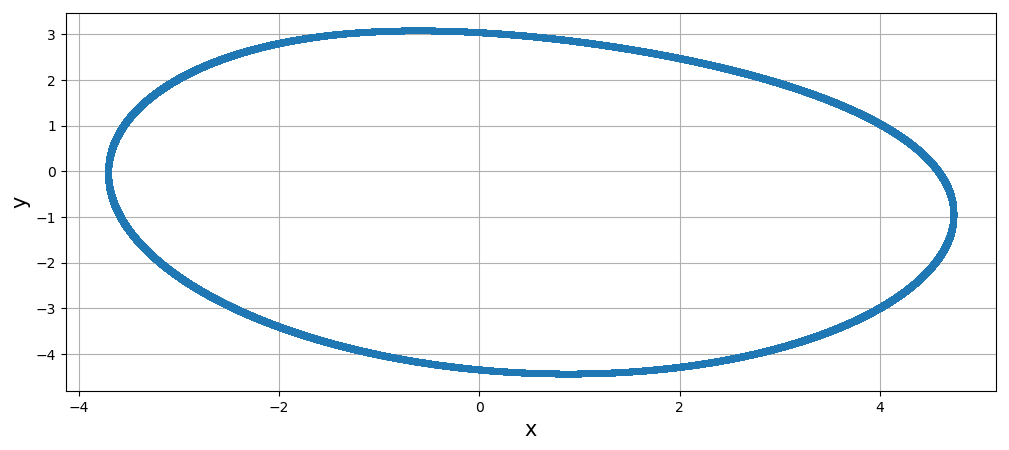

In [98]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 2.5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(yRK4[40000:,0], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

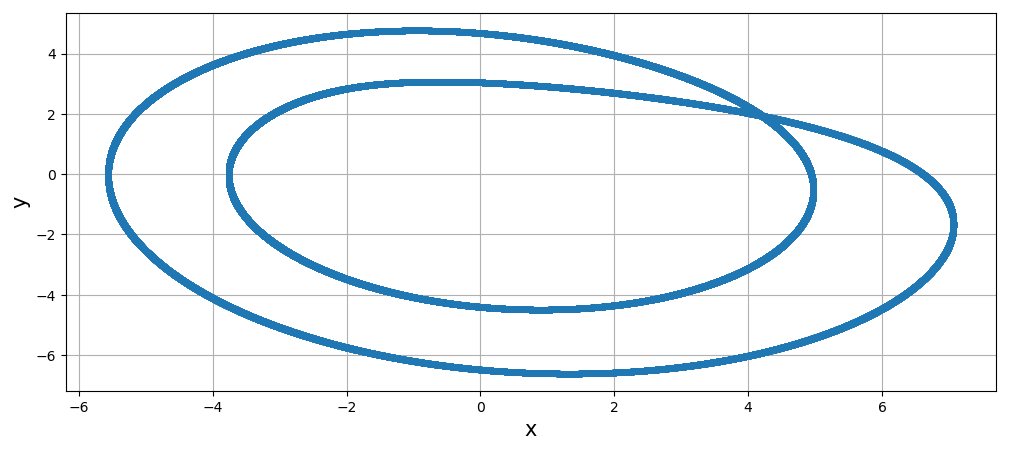

In [75]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 3.5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(yRK4[40000:,0], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

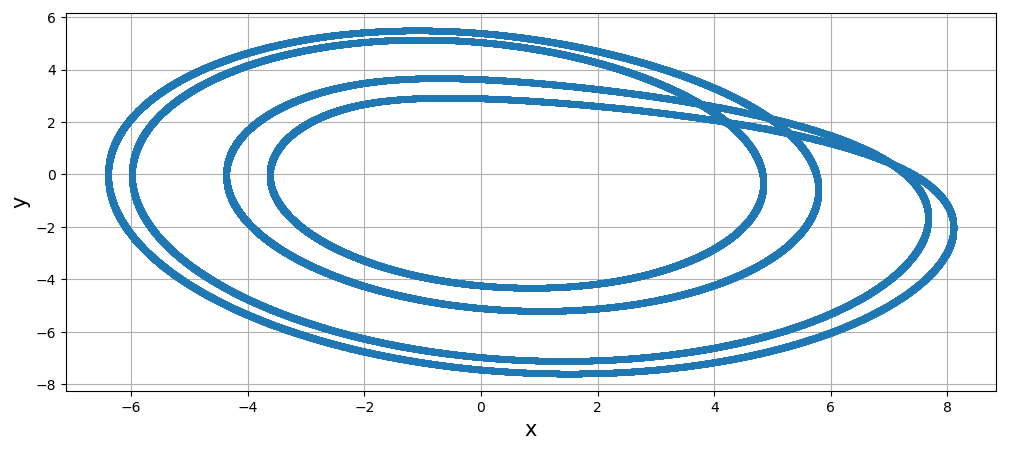

In [79]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 4])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(yRK4[40000:,0], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

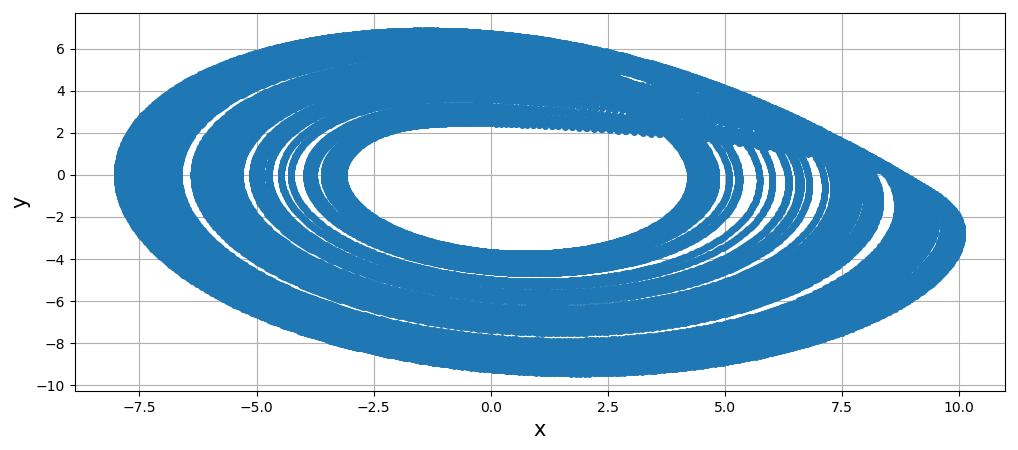

In [78]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(yRK4[40000:,0], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

Shown in the above four plots, we can see that while values of c change, the low values are periodic for c values of 2.5, 3.5 and 4, but turn chaotic once we hit c = 5.

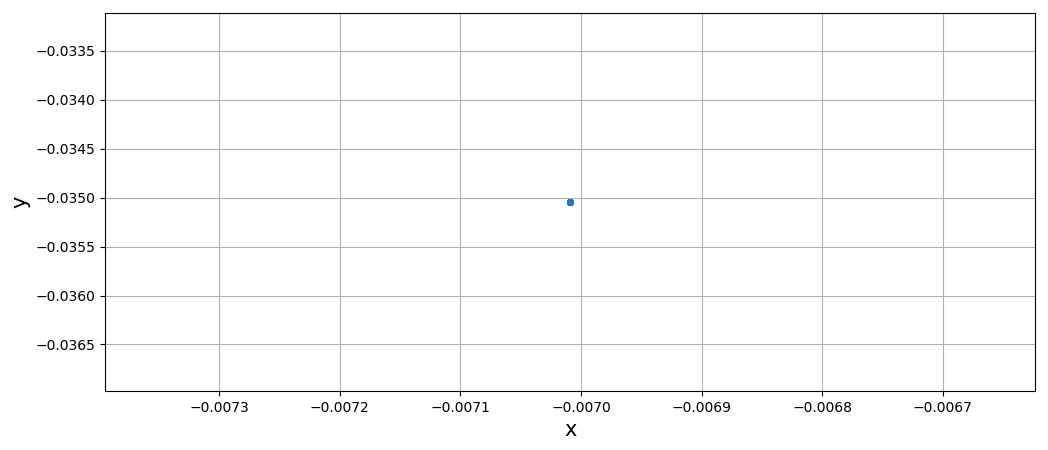

In [108]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([-0.2, 0.2, 5.7])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(yRK4[40000:,0], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

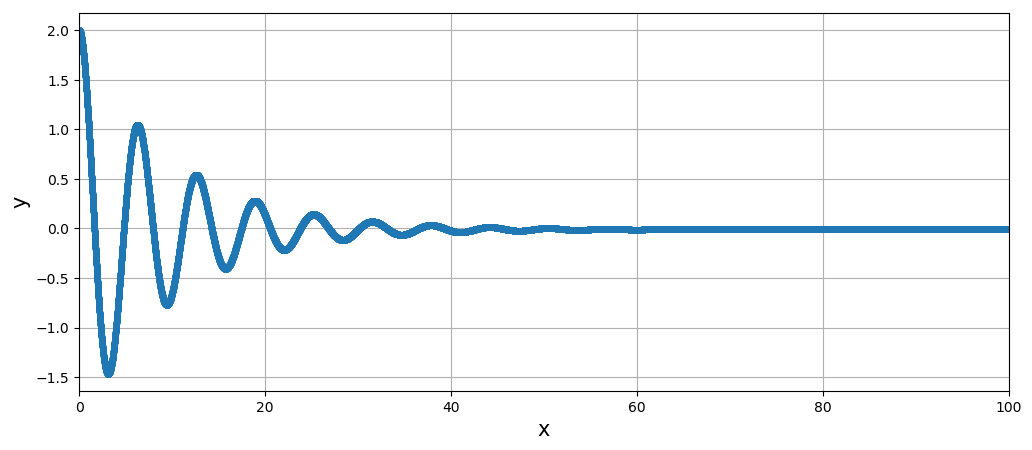

In [103]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([-0.2, 0.2, 5.7])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList, yRK4[:,0],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.set_xlim(0,100)
axes.grid(True)

Shown above in the two plots where a < 0, we observe that the system trajectory, as mentioned in the project notes, approached the point of (0,0,0).

The below graphs demonstrate the relationship for the time series $x$ vs $t$ and $y$ vs $t$. The first four graphs represent $x$ vs $t$ for the same $c$ values used above: 2.5, 3.5, 4, and 5. The following four graphs represent $y$ vs $t$ for those same $c$ values.

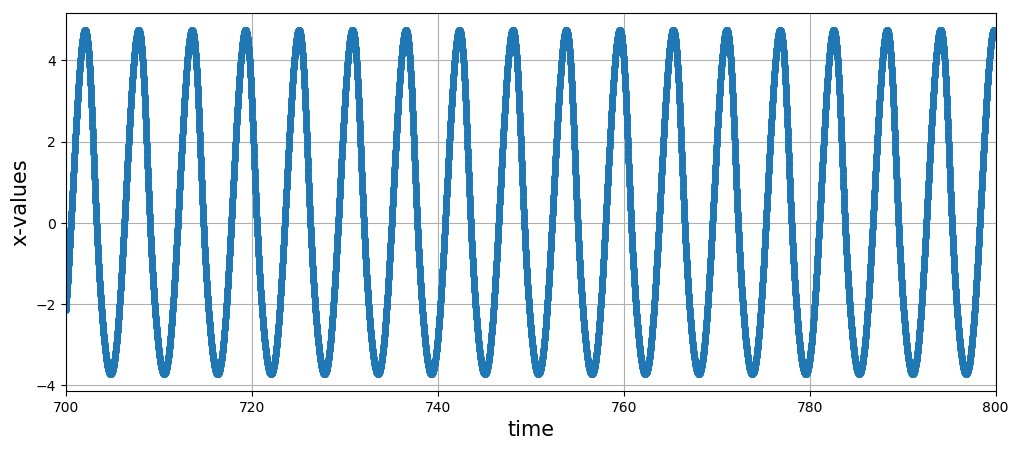

In [118]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 2.5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('x-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

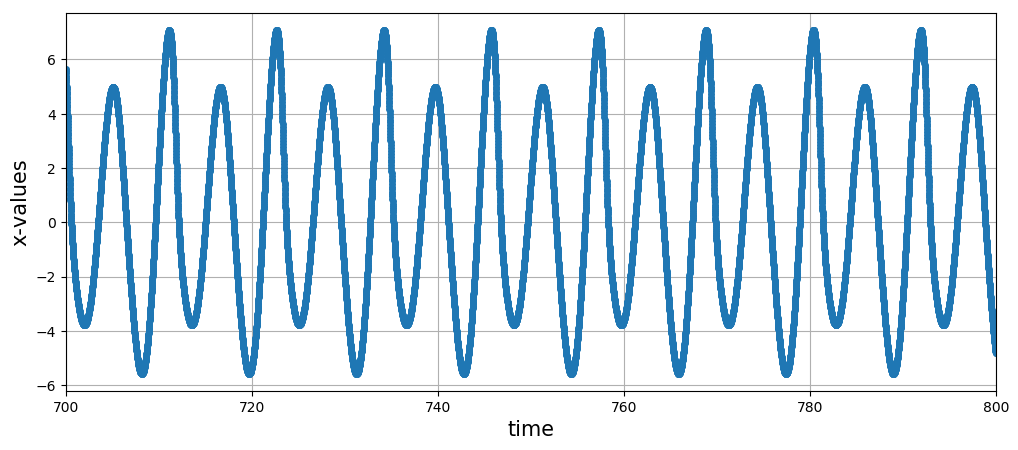

In [119]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 3.5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('x-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

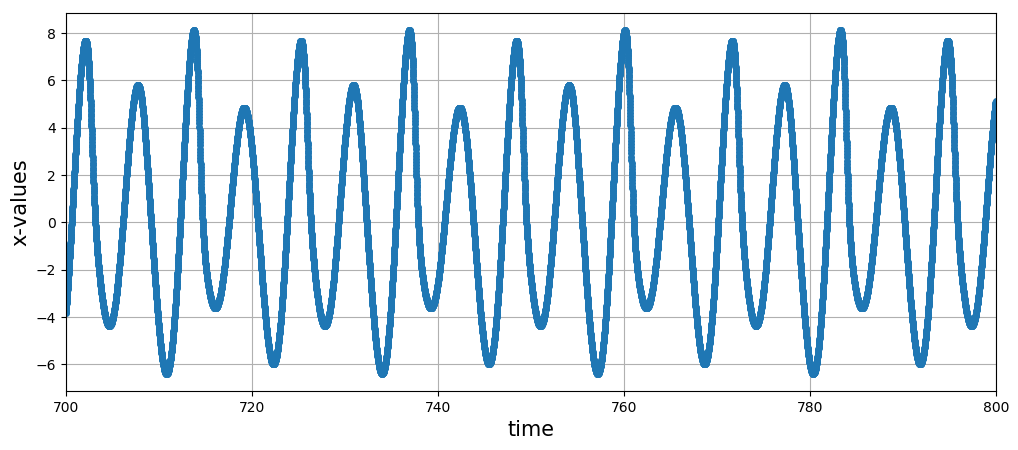

In [120]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 4])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('x-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

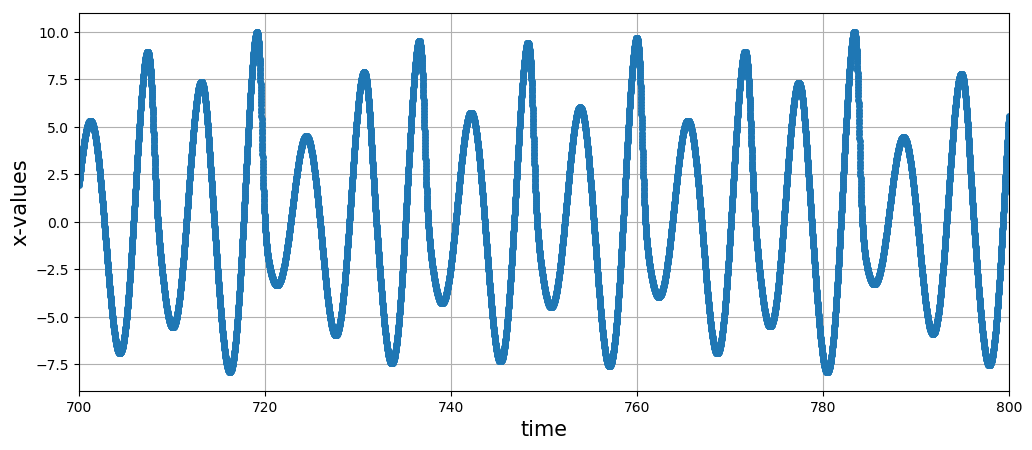

In [121]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('x-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

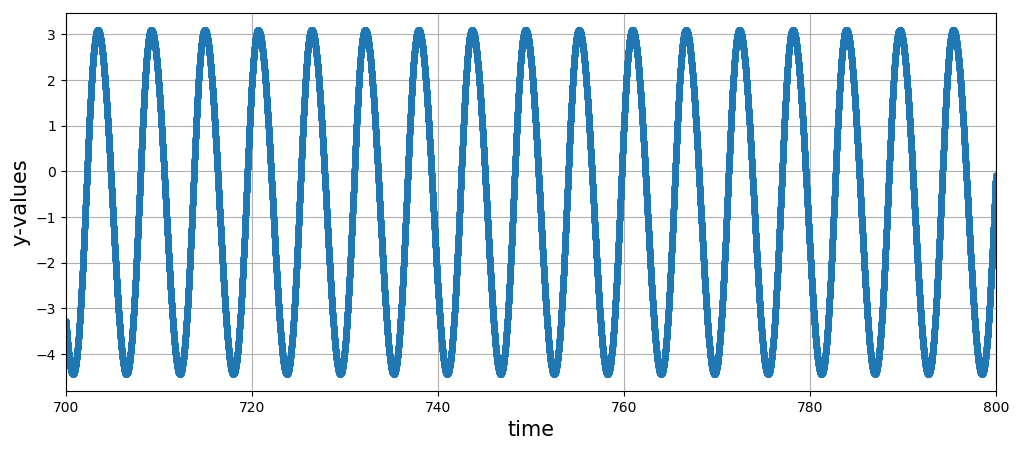

In [122]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 2.5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('y-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

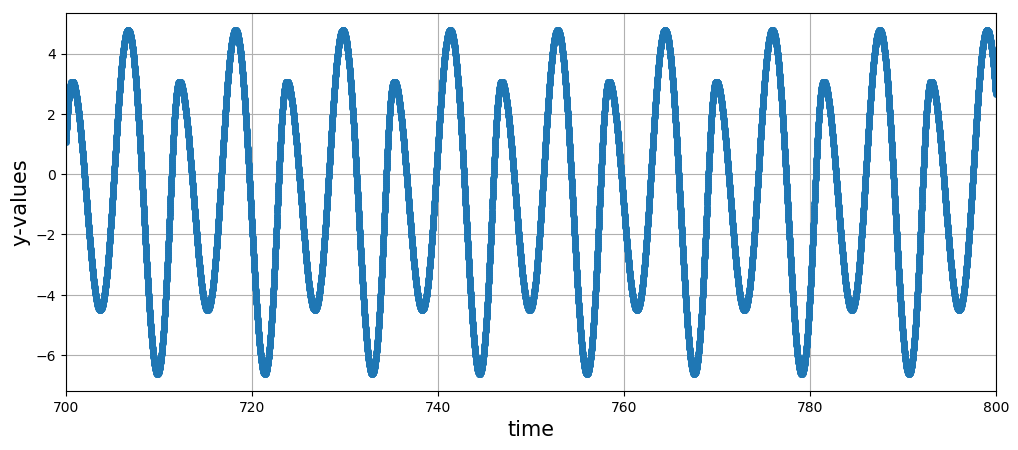

In [123]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 3.5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('y-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

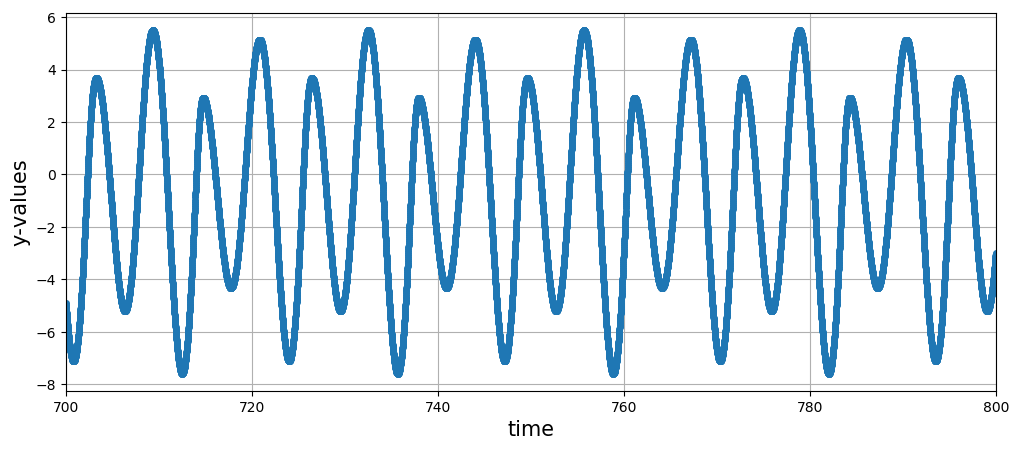

In [124]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 4])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('y-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

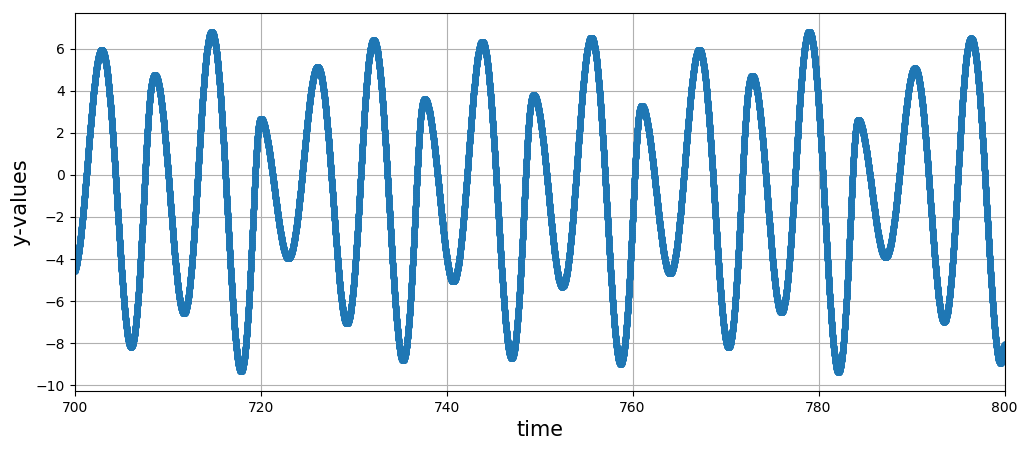

In [125]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('y-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

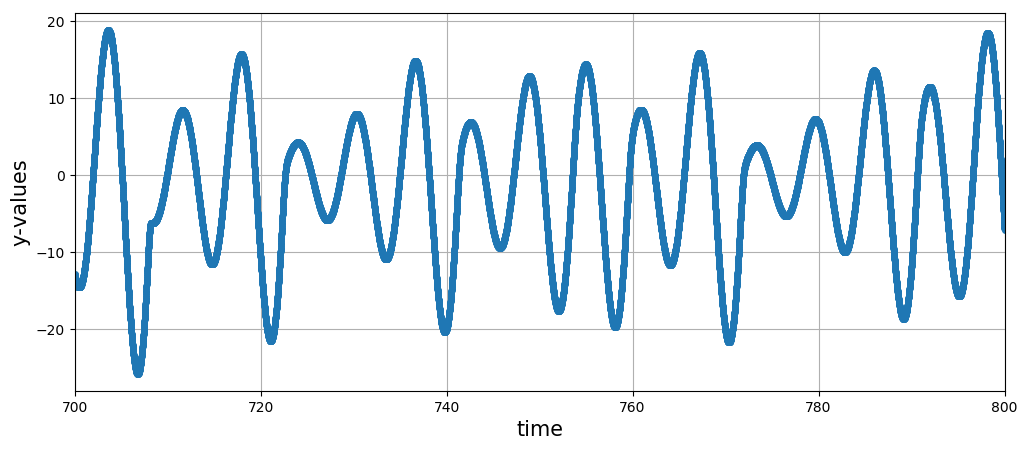

In [136]:
numIter = 80000
yRK4 = np.zeros((numIter,3))
yInit = 2.0
yRK4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 14])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i, :] = rk4(shoFunction, h, yRK4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5), dpi = 100)

axes.plot(tList[40000:], yRK4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('y-values', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

In the previous nine plots, we are able to observe the different trends in behavior for the time series $x$ vs $t$ and $y$ vs $t$. When compared to our $x$ vs $y$ plots, we observe identical behavior in which the $c$ values of 2.5, 3.5, and 4 demonstrate periodicity, however, upon reaching a value of 5 begins to demonstrate chaotic and aperiodic behavior. This is further demonstrated in the most recent plot for $c = 14$ where there is no identifiable pattern.

# CONCLUSION

Throughout this project, we were able to successfully breakdown the radioactive decay equation and demonstrate how to solve for half-life, the decay constant, as well as a small detour to investigate Plutonium-239 and show how to find it's specific half-life, decay constant, and calculate units remaining over time. We proved that the half-life equation, $T_{1/2} = \frac{log2}{\lambda}$ can be derived from the exact solution for the radioactive decay equation, $N = N_0e^{-\lambda t}$.

Additionally, we utilized both the Euler method and RK4 method and were able to demonstrate their capabilities and differences with regards to radioactive decay. We briefly observed that while the Euler method may reach the the calculations for new populations faster, the RK4 method has much better accuracy. As mentioned earlier in the project, both methods will reach the correct values at some point, however, *when* they reach them, the amount of error allowed, and how close they are at that moment is the critical difference between the two.

finally, we investigated the Rossler equations, which is a system of differential equations and how their parameters influence behavior and influence eachother. We plotted several examples of this system of equations for multiple values of $a$ and $c$, and demonstrated that at certain values, the Rossler equations display periodcity, or recurring patterns at intervals, while other values displayed aperiodicity and chaotic behavior. We compared $x$ and $y$ values against each other as well as time series for $x$ and $y$ versus $t$ to further characterize and display this behavior and their trends in a graphical nature.

### SOURCES

[1] Class Notes / Professor's Notes/Emails

[2] https://en.wikipedia.org/wiki/Half-life

[3] http://www.coolmath.com/algebra/17-exponentials-logarithms/13-radioactive-decay-decibel-levels-01

[4] https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor